# Récap en Tensorflow

In [2]:
%matplotlib inline

In [22]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
plt.style.use('ggplot')

In [23]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

In [24]:
x_train.shape

(60000, 28, 28)

In [25]:
x_test.shape

(10000, 28, 28)

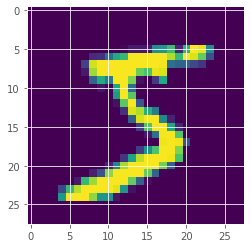

In [26]:
plt.imshow(x_train[0])

In [27]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(x_train.shape[1], x_train.shape[2])),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(x_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 2.8387 - accuracy: 0.8428
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4250 - accuracy: 0.8970
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3199 - accuracy: 0.9195
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2689 - accuracy: 0.9310
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2395 - accuracy: 0.9399


In [28]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 1s 1ms/step - loss: 0.2804 - accuracy: 0.9314


[0.2804112136363983, 0.9314000010490417]

In [32]:
prediction1 = model.predict(x_test)

In [33]:
np.argmax(prediction1[5])

1

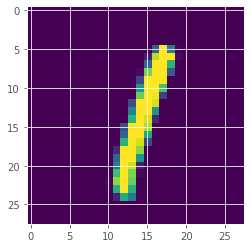

In [34]:
plt.imshow(x_test[5])

In [35]:
y_label = [np.argmax(y) for y in prediction1]

In [37]:
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_label)

Text(0.5, 51.0, 'Valeurs prédites')

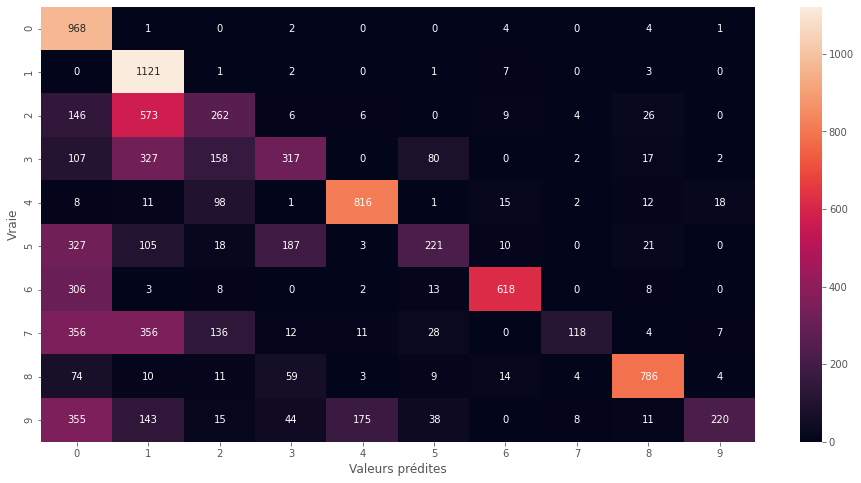

In [38]:
plt.figure(figsize=(16, 8))
sns.heatmap(cm, annot=True, fmt='d')
plt.ylabel('Vraie')
plt.xlabel('Valeurs prédites')

In [39]:
x_train_2 = x_train/255
x_test_2 = x_test/255

In [71]:
model_2 = keras.Sequential([
    keras.layers.Flatten(input_shape=(x_train_2.shape[1], x_train_2.shape[2])),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model_2.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model_2.fit(x_train_2, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2739 - accuracy: 0.9222
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1236 - accuracy: 0.9634
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0866 - accuracy: 0.9739
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0652 - accuracy: 0.9805
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0512 - accuracy: 0.9838


In [41]:
model_2.evaluate(x_test_2, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0807 - accuracy: 0.9750


[0.08068858087062836, 0.9750000238418579]

In [84]:
prediction_2 = model_2.predict(x_test_2)

In [85]:
np.argmax(prediction_2[6])

4

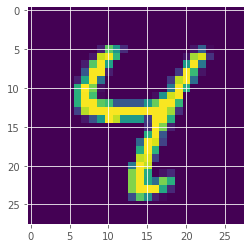

In [86]:
plt.imshow(x_test[6])

In [87]:
y_label_2 = [np.argmax(y) for y in prediction_2]

In [88]:
cm_2 = tf.math.confusion_matrix(labels=y_test, predictions=y_label_2)

Text(0.5, 51.0, 'Valeurs prédites')

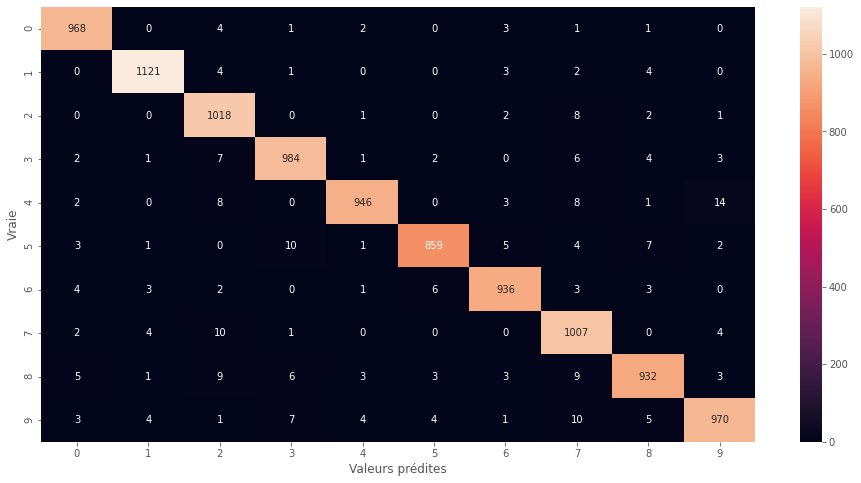

In [89]:
plt.figure(figsize=(16, 8))
sns.heatmap(cm_2, annot=True, fmt='d')
plt.ylabel('Vraie')
plt.xlabel('Valeurs prédites')